# Simple linear regression

In case of one feature ($d=1$) linear regression is written as

```{math}
    :label: simple-lin-reg
    y = a x + b.
```

The parameters of this model $\boldsymbol \theta = (a, b)$, where
$b$ is **intercept** (or **bias**), $a$ is **slope**. 

The {ref}`feature matrix <feature-matrix>` here has only one column, denote it $\boldsymbol x$ and let $\boldsymbol y$ be the vector of corresponding labels. Also denote

* $\overline {\boldsymbol x} = \frac 1n \sum\limits_{i=1}^n x_i$ — sample mean of predictors;
* $\overline {\boldsymbol y} = \frac 1n \sum\limits_{i=1}^n y_i$ — sample mean of targets.

## MSE fit

Use MSE to fit parameters $\boldsymbol \theta = (a, b)$:

```{math}
:label: 1-d-mse
\mathcal L(a, b) =  \frac 1n\sum\limits_{i=1}^n (y_i - ax_i - b)^2 \to \min\limits_{a, b}.
```
   


````{admonition} What about some calculus?
:class: dropdown
We have

$$
    \frac{\partial \mathcal L}{\partial a} = -\frac 2n\sum\limits_{i=1}^n x_i(y_i - ax_i - b) = 0,
$$

$$
    \frac{\partial \mathcal L}{\partial b} = -\frac 2n\sum\limits_{i=1}^n (y_i - ax_i - b) = 0.
$$

From the last equality it follows that

$$
    b = \overline {\boldsymbol y} - a \overline {\boldsymbol x} 
$$

TODO: Finish the proof
````

The optimal parameters are

```{math}
    :label: 1-d-weights
    \widehat a = \frac{\sum\limits_{i=1}^n (x_i - \overline {\boldsymbol x})(y_i - \overline {\boldsymbol y})}{\sum\limits_{i=1}^n (x_i - \overline {\boldsymbol x})^2}, \quad 
    \widehat b = \overline {\boldsymbol y} - \widehat a \overline {\boldsymbol x}.
```

Note that the slope is equal to the ratio of sample correlation between $\boldsymbol x$ and $\boldsymbol y$ to the sample variance of $\boldsymbol x$.

```{admonition} Question
:class: important
Does {eq}`1-d-weights` work for all possible values of $\boldsymbol x$ and $\boldsymbol y$?
```

## Dummy model

The model {eq}`simple-lin-reg` is simple but we can do even simpler! Let $a=0$ and predict labels by a **constant** (or **dummy**) model $\widehat y = b$. In fact, for constant predictions you don't need any features, only labels do the job.

```{admonition} Question
:class: important
Which value of $b$ minimizes the MSE {eq}`1-d-mse`?
```

Linear regression can be used with different loss functions. For example, we can choose mean absolute error (MAE) instead of MSE:

```{math}
:label: 1-d-mae
\mathcal L(a, b) =  \frac 1n\sum\limits_{i=1}^n \vert y_i - ax_i - b\vert \to \min\limits_{a, b}.
```

This time it is unlikely that we can find the analytical solution. But maybe it can be done for the dummy model?

````{admonition} Question
:class: important
For which value of $b$ the value of MAE

$$
     \frac 1n\sum\limits_{i=1}^n \vert y_i - b\vert
$$

is minimal?

```{admonition} Answer
:class: tip, dropdown
$\widehat b = \mathrm{med}(\boldsymbol y)$ (see [this discussion](https://math.stackexchange.com/questions/113270/the-median-minimizes-the-sum-of-absolute-deviations-the-ell-1-norm) for details)
```
````

## RSS and $R^2$-score

Putting the optimal weights $\widehat a$ and $\widehat b$ into the loss function {eq}`1-d-mse`, we obtain **residual square error** (RSE). Multiplying by $n$ we get **residual sum of squares**

$$
    RSS = \sum\limits_{i=1}^n(y_i - \widehat a x_i - \widehat b)^2.
$$

Also, **total sum of squares** is defined as

$$
TSS = \sum\limits_{i=1}^n(y_i - \overline {\boldsymbol y})^2.
$$

A popular metric called **coefficient of determination** (or **$R^2$-score**) is defined as

```{math}
:label: R2-score
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum\limits_{i=1}^n(y_i - \widehat y_i)^2}{\sum\limits_{i=1}^n(y_i - \overline {\boldsymbol y})^2}.
```

The coefficient of determination shows proportion of variance explained. $R^2$-score does not exceed $1$ (the greater —  the better).

<span style="display:none" id="R2_dummy">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgJFJeMiQtc2NvcmUgb2YgdGhlIGR1bW15IG1vZGVsICRcXHdpZGVoYXQgeSA9IFxcb3ZlcmxpbmUge1xcYm9sZHN5bWJvbCB5fSQ/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDAsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIllvdSBuYWlsZWQgaXQhICRSXjIgPSAxIC0gMSA9IDAkIn0sIHsidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDEsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJObywgaXQgc2hvdWxkIGJlIHN1YnRyYWN0ZWQgZnJvbSAkMSQifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWy0xMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMCwgMF0sICJmZWVkYmFjayI6ICIkUl4yJC1zY29yZSBtdXN0IGJlIGJldHdlZW4gMCBhbmQgMSJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbMS4wMDAwMDAwMDAxLCAxMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMF0sICJmZWVkYmFjayI6ICIkUl4yJC1zY29yZSBtdXN0IGJlIGJldHdlZW4gMCBhbmQgMSJ9LCB7InR5cGUiOiAiZGVmYXVsdCIsICJmZWVkYmFjayI6ICJUaGlzIHZhbHVlIGxvb2tzIGluY29ycmVjdCJ9XX1d</span>

In [37]:
from jupyterquiz import display_quiz
display_quiz("#R2_dummy")

<IPython.core.display.Javascript object>

$R^2$-score measures the amount of variability that is left unexplained after performing the regression. It shows how better the model works in comparison with dummy prediction.

(boston-simple)=
## Example: Boston dataset

In [4]:
import pandas as pd
boston = pd.read_csv("../ISLP_datsets/Boston.csv").drop("Unnamed: 0", axis=1)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Let predictors be `lstat`, target — `medv`. Let's calculate the regression coefficients using {eq}`1-d-weights`:

In [5]:
import numpy as np

x = boston['lstat']
y = boston['medv']
a = np.sum((x -x.mean()) * (y - y.mean())) /  np.sum((x -x.mean()) ** 2)
b = y.mean() - a*x.mean()
a, b

(-0.9500493537579907, 34.5538408793831)

Now plot the data and the regression line:

In [9]:
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'size'   : 17,
        'weight' : 'normal'
       }

plt.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', titlesize=18)
# plt.rc('legend', fontsize=18)
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[T2A]{fontenc}')
plt.rc('text.latex', preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

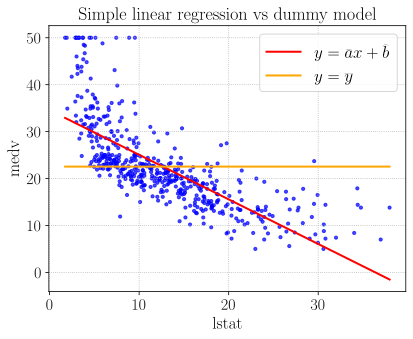

In [16]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
plt.scatter(x, y, s=10, c='b', alpha=0.7)
xs = np.linspace(x.min(), x.max(), num=10)
plt.plot(xs, a*xs + b, c='r', lw=2, label=r"$y = \widehat a x + \widehat b$")
plt.plot([xs.min(), xs.max()], [y.mean(), y.mean()], c='orange', lw=2, label=r"$y = \overline y$")
plt.xlabel("lstat")
plt.ylabel("medv")
plt.title("Simple linear regression vs dummy model")
plt.legend()
plt.grid(ls=":");

Calculate MSE:

In [19]:
mse_lin_reg = np.mean((y - a*x - b)**2)
mse_dummy = np.mean((y - y.mean())**2)
print("Linear regression MSE:", mse_lin_reg)
print("Dummy model MSE:", mse_dummy)

Linear regression MSE: 38.48296722989415
Dummy model MSE: 84.41955615616556


Coefficient of determination:

In [20]:
print("R2-score:", 1 - mse_lin_reg / np.mean((y - y.mean())**2))
print("Dummy R2-score:", 1 - mse_dummy / np.mean((y - y.mean())**2))

R2-score: 0.5441462975864798
Dummy R2-score: 0.0


Of course, the linear regression line can be found automatically:

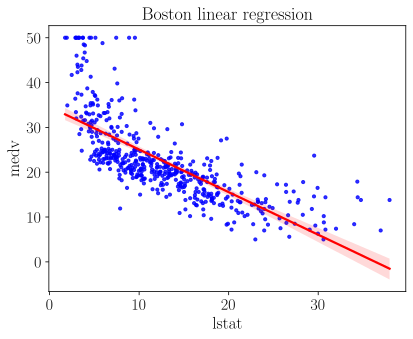

In [24]:
import seaborn as sb

sb.regplot(boston, x="lstat", y="medv",
           scatter_kws={"color": "blue", "s": 10}, line_kws={"color": "red"}, 
           ).set_title('Boston linear regression');

Linear regression from `sklearn`:

In [31]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
x_reshaped = x.values.reshape(-1, 1)
LR.fit(x_reshaped, y)
print("intercept:", LR.intercept_)
print("slope:", LR.coef_[0])
print("r-score:", LR.score(x_reshaped, y))
print("MSE:", np.mean((LR.predict(x_reshaped) - y) ** 2))

intercept: 34.5538408793831
slope: -0.9500493537579906
r-score: 0.5441462975864797
MSE: 38.48296722989415


Compare this with dummy model:

In [7]:
dummy_mse = np.mean((y - y.mean())**2)
print(dummy_mse)

84.41955615616556


## Exercises

1. Prove that $\frac 1n \sum\limits_{i=1}^n (x_i - \overline {\boldsymbol x})^2 = \overline {\boldsymbol x^2}  - (\overline {\boldsymbol x})^2$ where $\overline {\boldsymbol x^2} = \frac 1n\sum\limits_{i=1}^n x_i^2$.

```{admonition} TODO
:class: warning
* Finish analytical derivation of $a$ and $b$
* Add some quizzes
* Add more datasets (may me even simulated)
* Think about cases where the performance of linear model is poor
```
